# 3. Modelling

## 3.1 Imports

In [1]:
#f1 score and guassian

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# from sklearn.naive_bayes import GaussianNB
from Classification import Classification

C:\Users\candy\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\candy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
x_train = pd.read_csv('3.x_train_data.csv')
y_train = pd.read_csv('3.y_train_data.csv')

In [4]:
print(x_train.shape)
print(y_train.shape)

(7524, 170)
(7524, 1)


## 3.1 Train and Validation Split

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['score'],test_size=.25,random_state=42)

In [6]:
skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

## 3.2 Decision Tree (Baseline)

### 3.2.1 1st Attempt

In [7]:
params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,4,5,6,7,8,9]}

In [8]:
dec_tree_1 = Classification('Decision Tree',x_train,x_val,y_train,y_val)

In [9]:
dec_tree_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,Decision Tree,0.401737,0.360447


The best hyperparameters are:  {'max_depth': 9, 'min_samples_leaf': 15} 



### 3.2.2 2nd Attempt

In [10]:
params = {'min_samples_leaf':[3,4,5],
          'max_depth':[7,8,9,10]}

In [11]:
dec_tree_2 = Classification('Decision Tree',x_train,x_val,y_train,y_val)

In [12]:
dec_tree_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,Decision Tree,0.41485,0.360447


The best hyperparameters are:  {'max_depth': 9, 'min_samples_leaf': 5} 



## 3.3 Random Forest

### 3.3.1 1st Attempt

In [13]:
params = {'min_samples_leaf':[3,5,10,15,30,50,100],
          'max_depth':[3,5,7,9,11,13,15]}

In [14]:
ran_for_1 = Classification('Random Forest',x_train,x_val,y_train,y_val)

In [15]:
ran_for_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,Random Forest,0.621124,0.454545


The best hyperparameters are:  {'max_depth': 13, 'min_samples_leaf': 5} 



### 3.3.2 2nd Attempt

In [16]:
params = {'min_samples_leaf':[7,8,9,10,11,12,13,14],
          'max_depth':[13,14,15,16,17,18]}

In [17]:
ran_for_2 = Classification('Random Forest',x_train,x_val,y_train,y_val)

In [18]:
ran_for_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,Random Forest,0.594187,0.454014


The best hyperparameters are:  {'max_depth': 16, 'min_samples_leaf': 10} 



### 3.3.3 3rd Attempt

In [19]:
params = {'min_samples_leaf':[7,8,9,10,11,12,13,14],
          'max_depth':[17,18,19,20,21,22]}

In [20]:
ran_for_3 = Classification('Random Forest',x_train,x_val,y_train,y_val)

In [21]:
ran_for_3.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,Random Forest,0.615276,0.467836


The best hyperparameters are:  {'max_depth': 22, 'min_samples_leaf': 11} 



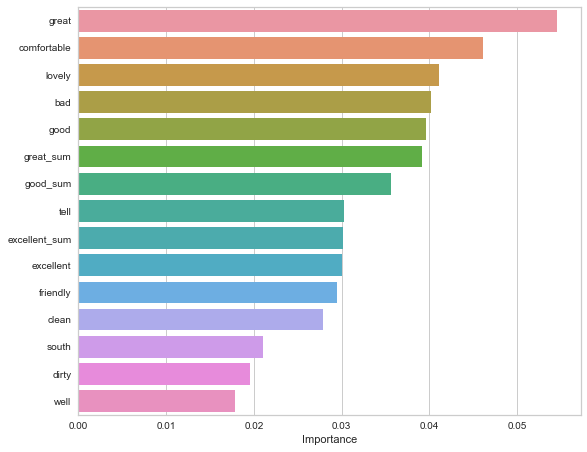

In [22]:
ran_for_3.get_feature_importances()

## 3.4 Logistic Regression

### 3.4.1 1st Attempt

In [23]:
params = {}

In [24]:
log_reg_1 = Classification('Logistic Regression',x_train,x_val,y_train,y_val)

In [25]:
log_reg_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,Logistic Regression,0.574872,0.509304


### 3.4.2 2nd Attempt

## 3.5 Support Vector Machines

### 3.5.1 1st Attempt

In [27]:
params = {'kernel':['poly'],
          'degree':[2,3,4]}

In [28]:
svm_1 = Classification('SVM',x_train,x_val,y_train,y_val)

In [29]:
svm_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,SVM,0.845472,0.508772


The best hyperparameters are:  {'degree': 2, 'kernel': 'poly'} 



### 3.5.2 2nd Attempt

In [30]:
params = {'C':[0.1,0.5,1,5],
          'kernel':['rbf','linear','sigmoid'],
          'gamma':['scale','auto']}

In [31]:
svm_2 = Classification('SVM',x_train,x_val,y_train,y_val)

In [32]:
svm_2.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,SVM,0.524898,0.516746


The best hyperparameters are:  {'C': 0.5, 'gamma': 'scale', 'kernel': 'sigmoid'} 



### 3.5.3 3rd Attempt

In [33]:
params = {'C':[0.3,0.4,0.5,0.6,0.7,0.8],
          'kernel':['linear'],
          'gamma':['scale']}

In [34]:
svm_3 = Classification('SVM',x_train,x_val,y_train,y_val)

In [35]:
svm_3.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,SVM,0.581783,0.519936


The best hyperparameters are:  {'C': 0.4, 'gamma': 'scale', 'kernel': 'linear'} 



## 3.6 Guassian Naive Bayes

### 3.6.1 1st Attempt

In [36]:
params = {}

In [37]:
gnb_1 = Classification('Naive Bayes',x_train,x_val,y_train,y_val)

In [38]:
gnb_1.get_scores(params,skf)

,Model Name,Train Accuracy,Validation Accuracy
0,Naive Bayes,0.407407,0.398192
